In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Potamies'
raceDate = '30/4/2023'
surface = 'Tarmac'
competition = 'cup'

link = 'https://www.ewrc-results.com/results/83949-hk-aebe-rally-sprint-potamies-giorgos-loukas-2023/?s='
startat, no_ss=422045, int(3)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Anapoliotakis,C1,5:49.77,-,114.8,1,Potamies,30/4/2023,Tarmac,cup,1
1,2,#3,Ktistakis Dimi,C3 F2,5:57.68,+7.91 + 7.91,112.2 0.71,1,Potamies,30/4/2023,Tarmac,cup,2
2,3,#2,Peroulakis Geo,C2,6:01.75,+11.98 + 4.07,111.0 1.07,1,Potamies,30/4/2023,Tarmac,cup,3
3,4,#10,Nikolidakis I.,C5 F2,6:05.32,+15.55 + 3.57,109.9 1.39,1,Potamies,30/4/2023,Tarmac,cup,4
4,5,#9,Damianakis Gia,C4 F2,6:07.46,+17.69 + 2.14,109.2 1.59,1,Potamies,30/4/2023,Tarmac,cup,5
5,6,#4,Frantzeskakis,C3 F2,6:12.06,+22.29 + 4.60,107.9 2.00,1,Potamies,30/4/2023,Tarmac,cup,6
6,7,#6,Titakis Titos,C3 F2,6:14.02,+24.25 + 1.96,107.3 2.17,1,Potamies,30/4/2023,Tarmac,cup,7
7,8,#11,Kafetzakis I.,C5 F2,6:18.09,+28.32 + 4.07,106.2 2.54,1,Potamies,30/4/2023,Tarmac,cup,8
8,9,#5,Gobakis Lefter,C3 F2,6:21.99,+32.22 + 3.90,105.1 2.89,1,Potamies,30/4/2023,Tarmac,cup,9
9,10,#8,Perakis A. -,C4 F2,6:24.01,+34.24 + 2.02,104.5 3.07,1,Potamies,30/4/2023,Tarmac,cup,10


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Anapoliotakis,C1,1,Potamies,30/4/2023,Tarmac,cup,1,349.77
1,Ktistakis Dimi,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,2,357.68
2,Peroulakis Geo,C2,1,Potamies,30/4/2023,Tarmac,cup,3,361.75
3,Nikolidakis I.,C5 F2,1,Potamies,30/4/2023,Tarmac,cup,4,365.32
4,Damianakis Gia,C4 F2,1,Potamies,30/4/2023,Tarmac,cup,5,367.46
5,Frantzeskakis,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,6,372.06
6,Titakis Titos,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,7,374.02
7,Kafetzakis I.,C5 F2,1,Potamies,30/4/2023,Tarmac,cup,8,378.09
8,Gobakis Lefter,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,9,381.99
9,Perakis A. -,C4 F2,1,Potamies,30/4/2023,Tarmac,cup,10,384.01


In [49]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race     ss          
Potamies 1     349.77
         2     344.07
         3     341.78

In [50]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Anapoliotakis,C1,1,Potamies,30/4/2023,Tarmac,cup,1,349.77,349.77,0.00,0.000000,01
1,Ktistakis Dimi,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,2,357.68,349.77,7.91,2.261486,01
2,Peroulakis Geo,C2,1,Potamies,30/4/2023,Tarmac,cup,3,361.75,349.77,11.98,3.425108,01
3,Nikolidakis I.,C5 F2,1,Potamies,30/4/2023,Tarmac,cup,4,365.32,349.77,15.55,4.445779,01
4,Damianakis Gia,C4 F2,1,Potamies,30/4/2023,Tarmac,cup,5,367.46,349.77,17.69,5.057609,01
5,Frantzeskakis,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,6,372.06,349.77,22.29,6.372759,01
6,Titakis Titos,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,7,374.02,349.77,24.25,6.933127,01
7,Kafetzakis I.,C5 F2,1,Potamies,30/4/2023,Tarmac,cup,8,378.09,349.77,28.32,8.096749,01
8,Gobakis Lefter,C3 F2,1,Potamies,30/4/2023,Tarmac,cup,9,381.99,349.77,32.22,9.211768,01
9,Perakis A. -,C4 F2,1,Potamies,30/4/2023,Tarmac,cup,10,384.01,349.77,34.24,9.789290,01


In [51]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Anapoliotakis,C1,1,Potamies,30/4/2023,Tarmac,cup,1,349.77,349.77,0.00,0.000000,01
2,Peroulakis Geo,C2,1,Potamies,30/4/2023,Tarmac,cup,3,361.75,349.77,11.98,3.425108,01
17,Anapoliotakis,C1,2,Potamies,30/4/2023,Tarmac,cup,1,344.07,344.07,0.00,0.000000,02
19,Peroulakis Geo,C2,2,Potamies,30/4/2023,Tarmac,cup,3,353.39,344.07,9.32,2.708751,02
34,Anapoliotakis,C1,3,Potamies,30/4/2023,Tarmac,cup,1,341.78,341.78,0.00,0.000000,03
35,Peroulakis Geo,C2,3,Potamies,30/4/2023,Tarmac,cup,2,348.01,341.78,6.23,1.822810,03


In [52]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Potamies            
SS.                  01    02    03
Crew                               
Anapoliotakis      0.00  0.00  0.00
Peroulakis Geo    11.98  9.32  6.23

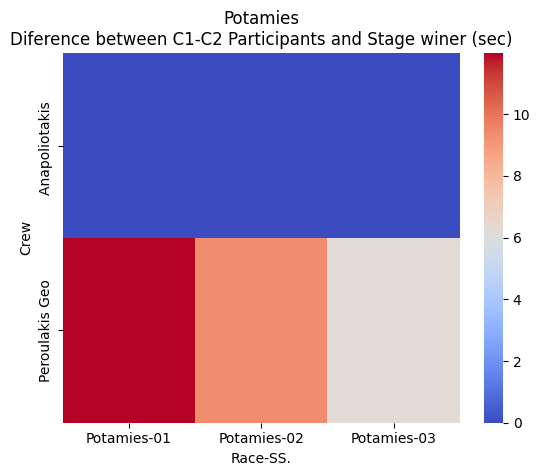

In [54]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C1-C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

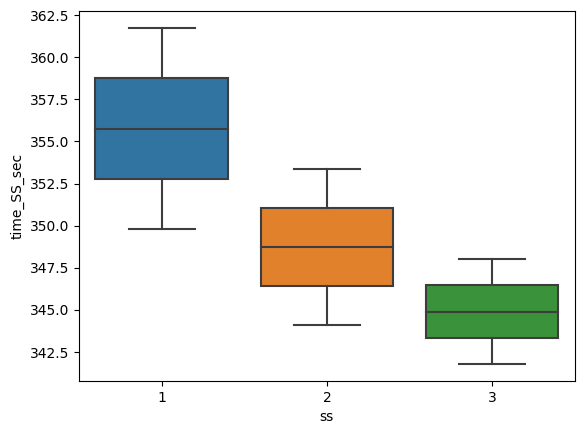

In [55]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

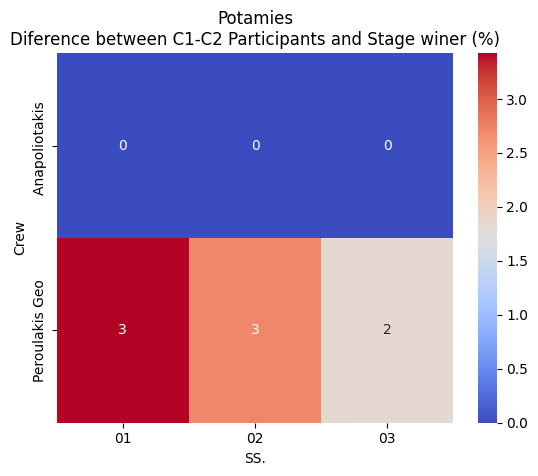

In [56]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1-C2 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")